1. Importing of libraries

In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


import pickle

2. Data preparation and observation

In [23]:
df = pd.read_csv("house-data.csv", sep=',')
df.shape

(21613, 21)

In [24]:
list(df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13304,723049533,20140930T000000,271000.0,4,1.75,1490,9112,1.0,0,0,...,6,970,520,1940,0,98146,47.4991,-122.345,1650,8411
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
16147,8854000010,20140812T000000,540000.0,5,2.75,3160,10059,2.0,0,0,...,10,1740,1420,1978,0,98011,47.7477,-122.217,3120,11557


In [27]:
#this will show us if any cleaning is necessary for the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

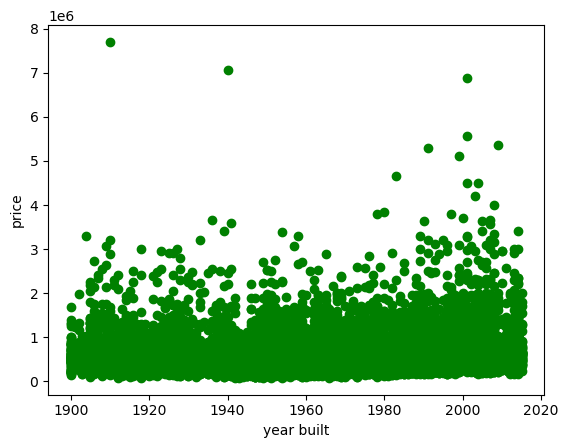

In [28]:
#seeing as the data is clean a quick look at some of the values plotted together can give more insight
plt.xlabel('year built')
plt.ylabel('price')
plt.scatter(df.yr_built, df.price, color='green')
plt.show()

C:\Users\Flobobo\AppData\Local\Temp\ipykernel_13648\3411767231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

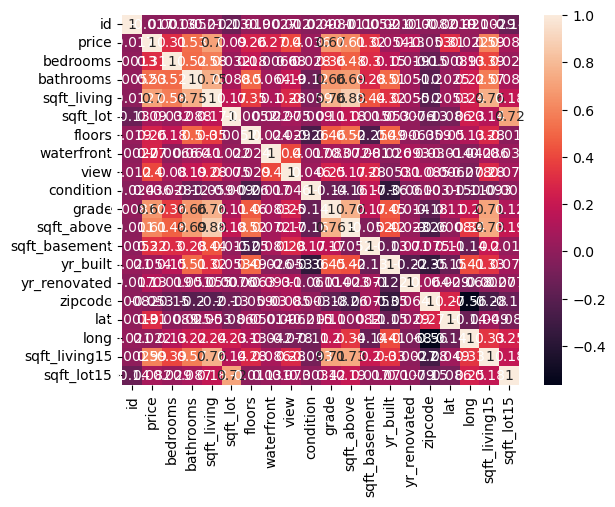

In [29]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

3. Model training

3.1 Linear Regression

In [32]:
X = df['price'].values.reshape(-1,1)
Y = df['grade'].values.reshape(-1,1)

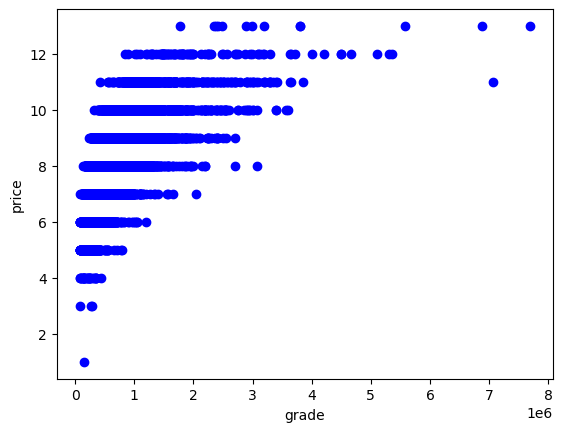

In [33]:
plt.xlabel('grade')
plt.ylabel('price')
plt.scatter(X, Y, color='blue')
plt.show()

In [34]:
X_train, X_test, Y_train, Y_test, = train_test_split(X,Y, random_state=123, test_size=0.15)

In [35]:
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(18371, 1)
(3242, 1)
(18371, 1)
(3242, 1)


In [36]:
myreg = LinearRegression()

In [37]:
myreg.fit(X_train, Y_train)
myreg

LinearRegression()

In [38]:
#extract calculated coefficients
a = myreg.coef_
b = myreg.intercept_
a

array([[2.14183128e-06]])

In [39]:
b

array([6.49901489])

In [40]:
Y_predicted = myreg.predict(X_test)
Y_predicted

array([[7.63954004],
       [7.37716571],
       [8.17499786],
       ...,
       [7.44570431],
       [7.1983228 ],
       [7.04518186]])

In [41]:
Y_test

array([[8],
       [7],
       [9],
       ...,
       [7],
       [7],
       [7]], dtype=int64)

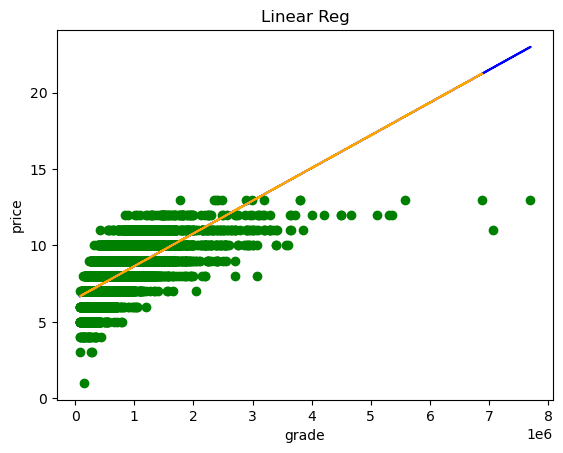

In [42]:
plt.title('Linear Reg')
plt.scatter(X,Y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, Y_predicted, color='orange')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

In [43]:
R2reg= myreg.score(X,Y)
R2reg

0.4454653399007371

Based on this low value for linear regression and the visualized model of the grade/price distribution shows us that a more appriopriated model would involve polynomial or multiple linear regression.